In [26]:
#import of modules
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time

In [13]:
#class with methods to visualize a graph
class GraphVisualization:
   
    def __init__(self):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
        self.visual = []
          
    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
          
    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.figure(figsize=(8, 6))
        plt.show()

In [3]:
#initiation of adjacency matrix with 500 edges and 100 vertices 
N = 100
E = 500
k = 0
matr = np.random.random_integers(0,0,size=(N,N))
for i in range(N):
    for j in range(N):
        if j>i:
            if k<E:
                matr[i][j]=np.random.random_integers(0,100)
                if matr[i][j]!=0:
                    k=k+1
        elif j==i:
            matr[i][j]=0
        else:
            matr[i][j]=matr[j][i]
print(k)
matr

500


<ipython-input-3-5f98c5529647>:5: DeprecationWarning: This function is deprecated. Please call randint(0, 0 + 1) instead
  matr = np.random.random_integers(0,0,size=(N,N))
<ipython-input-3-5f98c5529647>:10: DeprecationWarning: This function is deprecated. Please call randint(0, 100 + 1) instead
  matr[i][j]=np.random.random_integers(0,100)


In [4]:
#transfering adjacency matrix to the adjacency list
adj_list=dict()
for i in range(N):
    adj_list[i]=[]
for i in range(N):
    for j in range(N):
        if matr[i][j]!=0:
            adj_list[i].append(j)
print(adj_list)

{0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 1: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 2: [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 

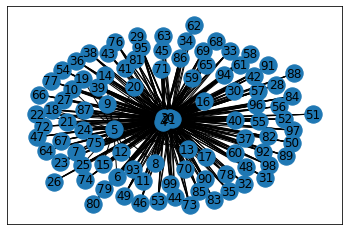

In [25]:
#graph visualization
G=nx.Graph()
graph = GraphVisualization()
for i in range(100):
    G.add_node(i)
for i in range(100):
    for j in range(100):
        if j>i and matr[i][j]>0:
            G.add_edge(i,j, weight=matr[i][j])
            graph.addEdge(i,j)
graph.visualize()

In [34]:
#performance comparison between Dijkstra algorithm and Bellman-Ford algorithm
u = np.random.randint(0,99)
dij,bf=0,0
for i in range(10):
    start_time=time.time()
    length, path = nx.single_source_dijkstra(G, u)
    end_time=time.time()
    dij=dij+end_time-start_time
dij=dij/10
for i in range(10):
    start_time=time.time()
    length, path = nx.single_source_bellman_ford(G, u)
    end_time=time.time()
    bf=bf+end_time-start_time
bf=bf/10
print('Dijkstra Time =', dij)
print('Bellman-Ford Time =',bf)
print('BF/Dij=',bf/dij)

Dijkstra Time = 0.0009981870651245117
Bellman-Ford Time = 0.002923393249511719
BF/Dij= 2.928702796952254


In [38]:
#Euclidean distance between points (heuristic for A*)
def dist(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

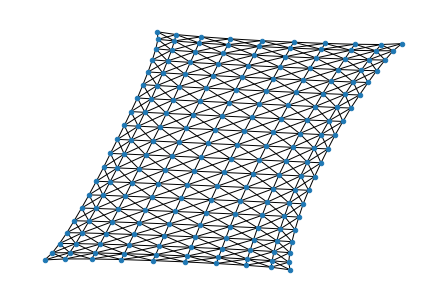

In [58]:
#cell generation for A*
G = nx.grid_2d_graph(10, 20)
for edge in G.edges:
    G.edges[edge]['weight'] = 1
G.add_edges_from([
    ((x, y), (x+1, y+1))
    for x in range(9)
    for y in range(19)
] + [
    ((x+1, y), (x, y+1))
    for x in range(9)
    for y in range(19)
], weight=1.41)
pos = nx.spring_layout(G, iterations=1000, seed=6)
nx.draw(G, pos, node_size=15)
plt.show()

Obstacle cells [(4, 18), (7, 15), (1, 16), (0, 18), (0, 5), (0, 15), (3, 4), (0, 2), (2, 5), (6, 17), (5, 16), (1, 11), (8, 5), (4, 10), (1, 18), (1, 5), (8, 9), (6, 5), (7, 14), (7, 9), (5, 6), (4, 14), (7, 7), (6, 15), (5, 1), (8, 12), (4, 5), (4, 2), (2, 10), (2, 16), (7, 3), (7, 8), (5, 17), (8, 1), (4, 8), (1, 12), (3, 2), (4, 7), (7, 0), (4, 15)]


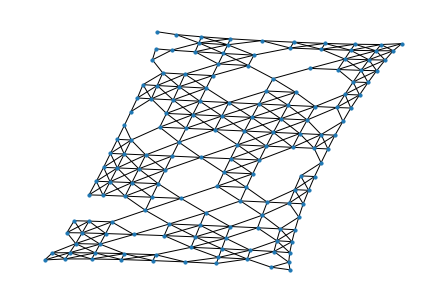

In [59]:
#random generation of obstacle nodes
removed = []
while len(removed) < 40:
    point = (np.random.randint(0,9), np.random.randint(0,19))
    if point not in removed:
        removed.append(point)

G.remove_nodes_from(removed)
print("Obstacle cells", removed)

nx.draw(G, pos, node_size=15)
plt.show()

In [104]:
#random generation of 5 pairs of non-obstacle vertices and A*-application 
all_pathes = []
for i in range(5):
    while 1:
        point1 = (np.random.randint(0, 9), np.random.randint(0, 19))
        point2 = (np.random.randint(0, 9), np.random.randint(0, 19))
        if (point1 not in removed) and (point2 not in removed):
            break
    print("from ", point1, "to", point2)
    path = nx.astar_path(G, point1, point2, heuristic=dist)
    all_pathes.append(path)
    print(path)

from  (7, 6) to (1, 13)
[(7, 6), (6, 7), (5, 8), (4, 9), (3, 10), (2, 11), (2, 12), (1, 13)]
from  (5, 2) to (4, 1)
[(5, 2), (4, 1)]
from  (7, 13) to (0, 3)
[(7, 13), (6, 12), (5, 11), (5, 10), (4, 9), (3, 8), (3, 7), (3, 6), (3, 5), (2, 4), (1, 3), (0, 3)]
from  (1, 3) to (3, 13)
[(1, 3), (2, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13)]
from  (2, 11) to (5, 13)
[(2, 11), (3, 12), (4, 13), (5, 13)]


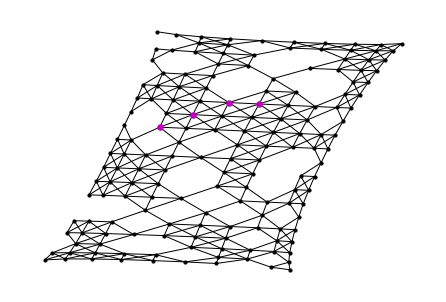

In [105]:
#paths visualization
nx.draw(G, pos, node_size=10, node_color='k')
nx.draw_networkx_nodes(G, pos, nodelist=all_pathes[0], node_color='b', node_size=30)
plt.show()
nx.draw(G, pos, node_size=10, node_color='k')
nx.draw_networkx_nodes(G, pos, nodelist=all_pathes[1], node_color='r', node_size=30)
plt.show()
nx.draw(G, pos, node_size=10, node_color='k')
nx.draw_networkx_nodes(G, pos, nodelist=all_pathes[2], node_color='g', node_size=30)
plt.show()
nx.draw(G, pos, node_size=10, node_color='k')
nx.draw_networkx_nodes(G, pos, nodelist=all_pathes[3], node_color='y', node_size=30)
plt.show()
nx.draw(G, pos, node_size=10, node_color='k')
nx.draw_networkx_nodes(G, pos, nodelist=all_pathes[4], node_color='m', node_size=30)
plt.show()